In [158]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
analysis = Analysis("/home/sergei/ray_results/bursts/")

In [7]:
target = 'policy_reward_mean/adversary'

In [45]:
df = analysis.dataframe(metric=target, mode=None)

In [46]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', 'policy_reward_min/victim',
       'policy_reward_min/adversary', 'policy_reward_max/victim',
       'policy_reward_max/adversary', 'policy_reward_mean/victim',
       'policy_reward_mean/adversary', 'hist_stats/episode_reward',
       'hist_stats/episode_lengths', 'hist_stats/policy_victim_reward',
       'hist_stats/policy_adversary_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 'timers/sample_throughput',
       'timers/learn_time_

In [49]:
df['logdir']

0      /home/sergei/ray_results/bursts/train_one_98_b...
1      /home/sergei/ray_results/bursts/train_one_96_b...
2      /home/sergei/ray_results/bursts/train_one_125_...
3      /home/sergei/ray_results/bursts/train_one_127_...
4      /home/sergei/ray_results/bursts/train_one_40_b...
                             ...                        
163    /home/sergei/ray_results/bursts/train_one_5_bu...
164    /home/sergei/ray_results/bursts/train_one_145_...
165    /home/sergei/ray_results/bursts/train_one_131_...
166    /home/sergei/ray_results/bursts/train_one_42_b...
167    /home/sergei/ray_results/bursts/train_one_114_...
Name: logdir, Length: 168, dtype: object

In [41]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target):
        del df[k]

In [42]:
df = df.sort_values(target, ascending=False)

In [43]:
df

AttributeError: 'DataFrame' object has no attribute 'done'

(array([34., 30., 21., 13., 11.,  8.,  7., 12., 13., 19.]),
 array([-0.10714286,  0.8597619 ,  1.82666667,  2.79357143,  3.76047619,
         4.72738095,  5.69428571,  6.66119048,  7.62809524,  8.595     ,
         9.56190476]),
 <a list of 10 Patch objects>)

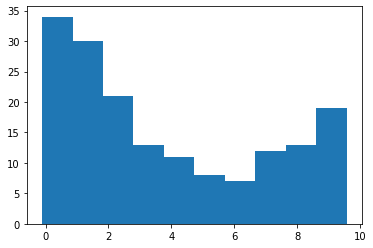

In [21]:
plt.hist(df[target])

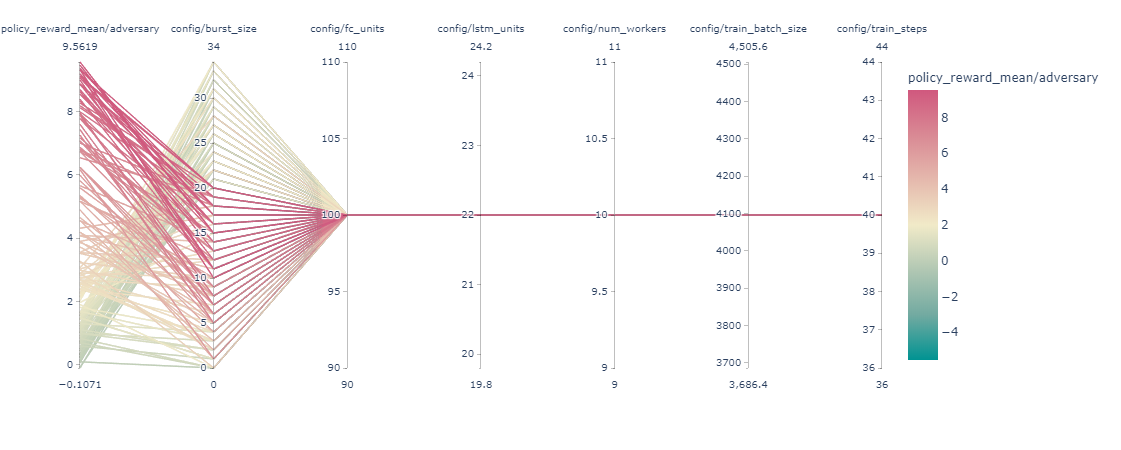

In [22]:
fig = px.parallel_coordinates(df, color=target,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [23]:
df.iloc[0]

policy_reward_mean/adversary       9.561905
config/burst_size                 15.000000
config/fc_units                  100.000000
config/lstm_units                 22.000000
config/num_workers                10.000000
config/train_batch_size         4096.000000
config/train_steps                40.000000
Name: 65, dtype: float64

In [24]:
df

,policy_reward_mean/adversary,config/burst_size,config/fc_units,config/lstm_units,config/num_workers,config/train_batch_size,config/train_steps
65,9.561905,15,100,22,10,4096,40
67,9.459524,15,100,22,10,4096,40
60,9.361905,17,100,22,10,4096,40
103,9.328571,18,100,22,10,4096,40
54,9.321429,20,100,22,10,4096,40
...,...,...,...,...,...,...,...
18,0.088095,24,100,22,10,4096,40
1,0.066667,26,100,22,10,4096,40
145,0.054762,30,100,22,10,4096,40
131,-0.080952,22,100,22,10,4096,40


(array([20., 15., 20., 15., 15., 20., 15., 20., 12., 16.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

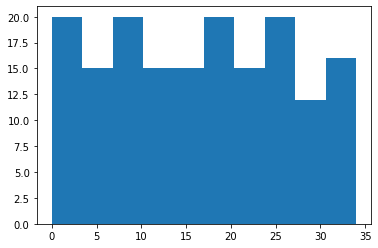

In [26]:
plt.hist(df['config/burst_size'])

In [50]:
dfs = analysis.trial_dataframes
df = analysis.dataframe(metric=target, mode=None)

108    40
Name: config/train_steps, dtype: int64

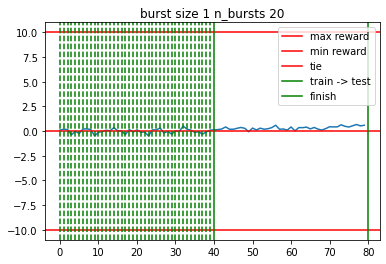

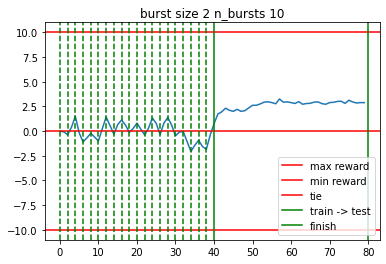

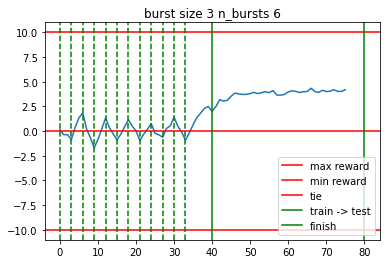

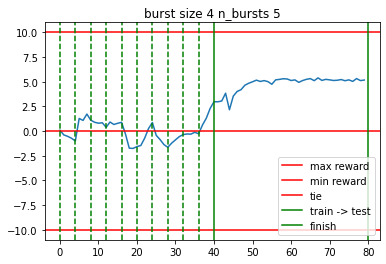

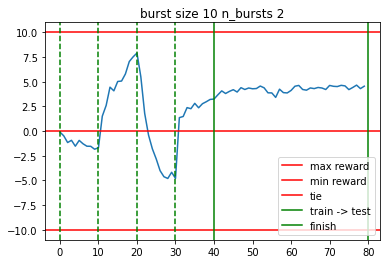

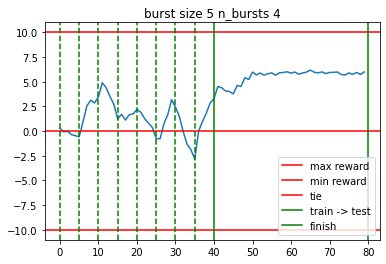

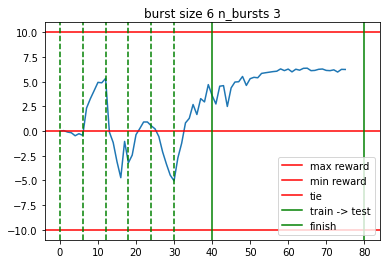

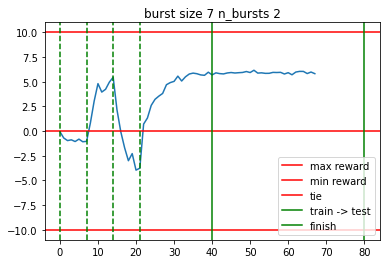

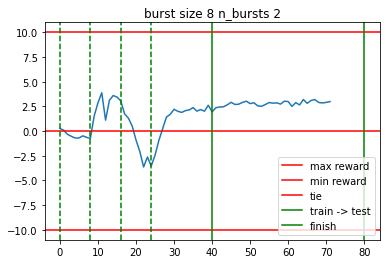

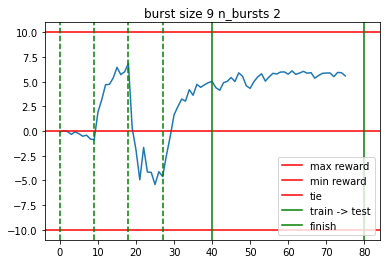

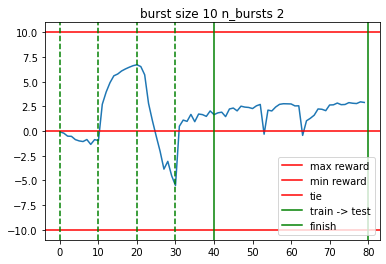

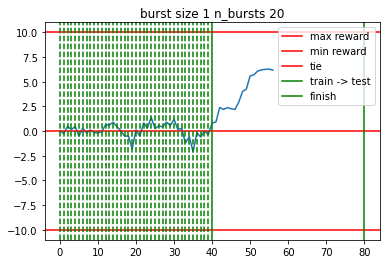

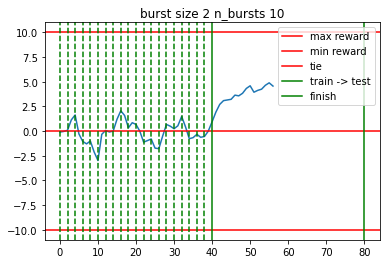

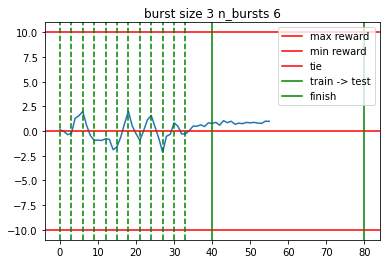

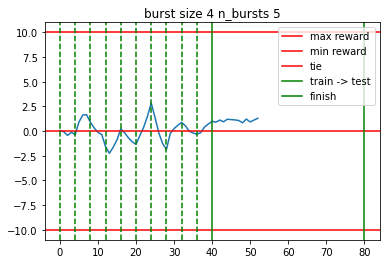

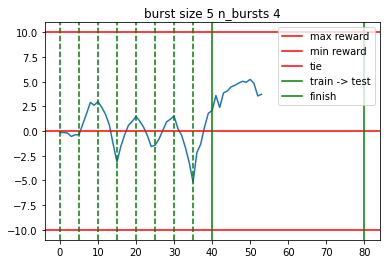

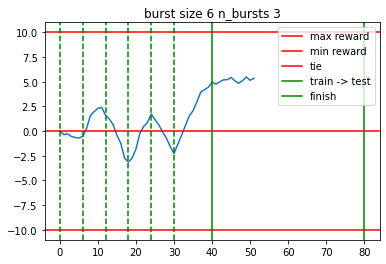

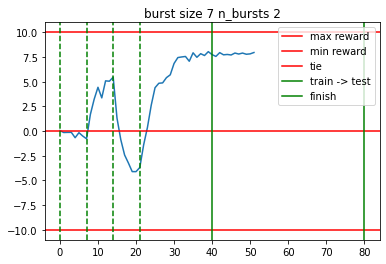

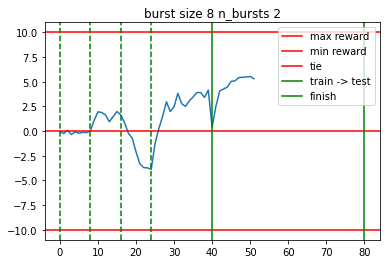

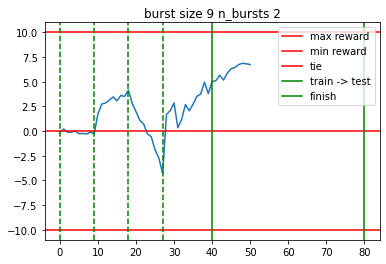

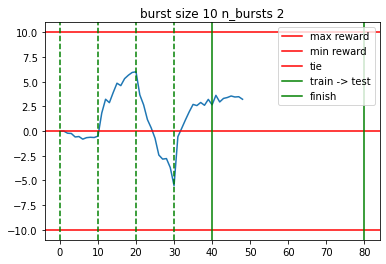

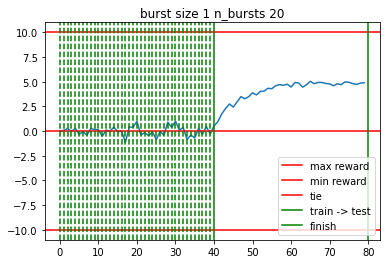

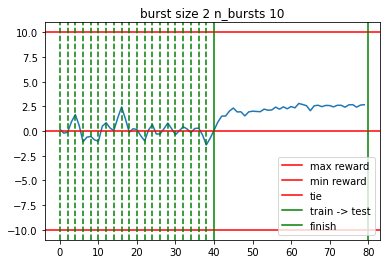

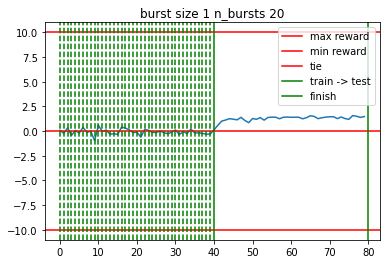

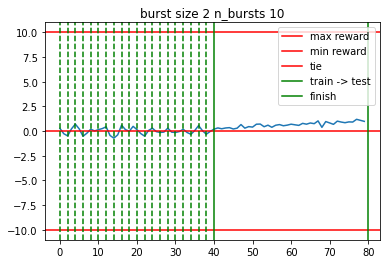

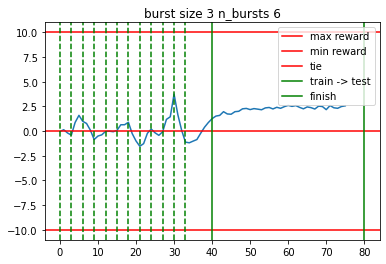

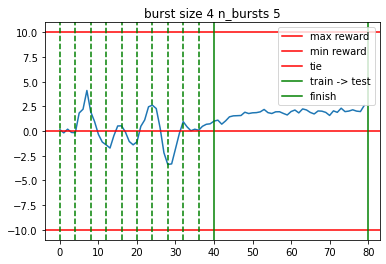

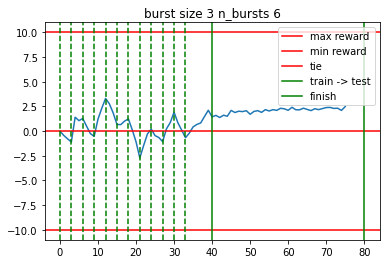

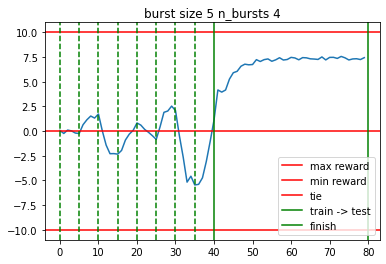

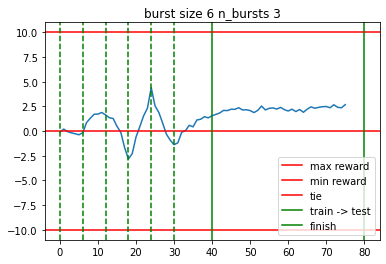

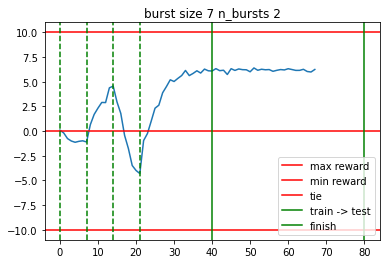

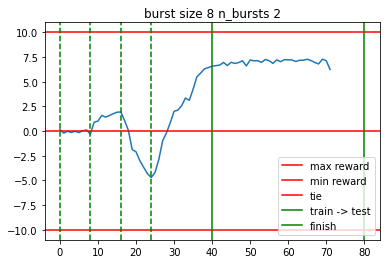

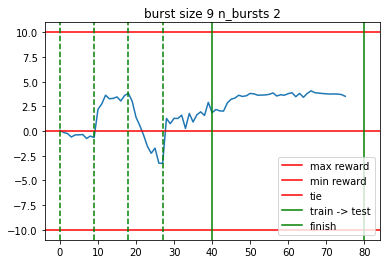

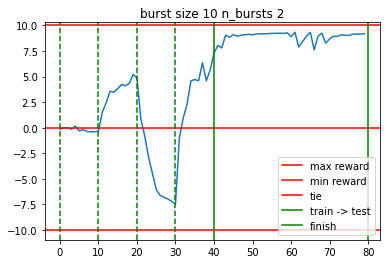

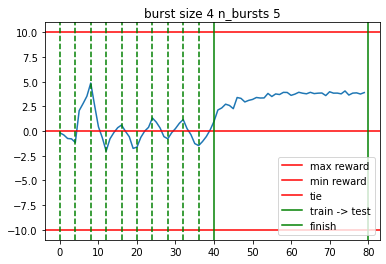

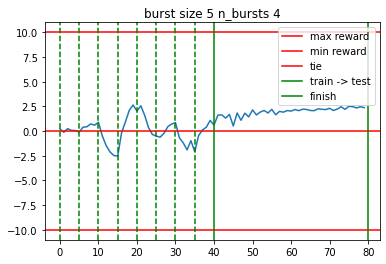

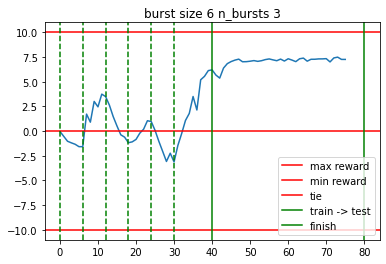

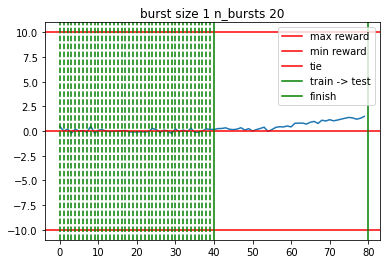

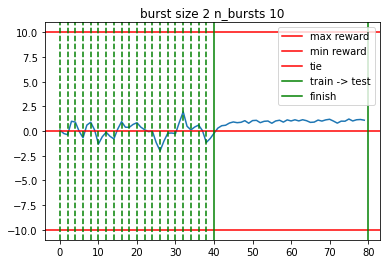

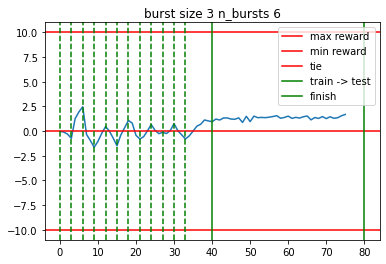

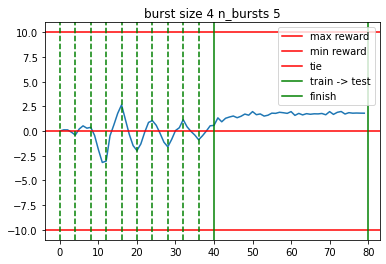

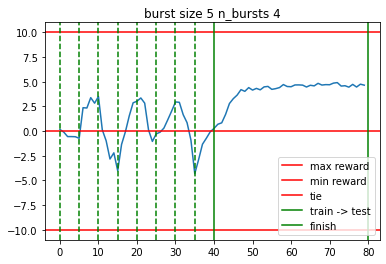

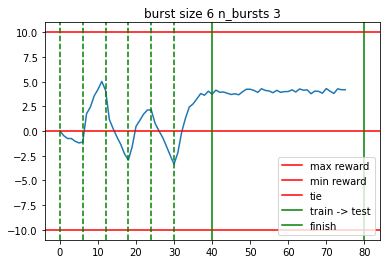

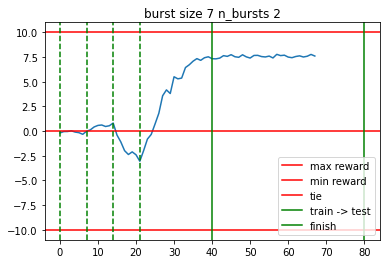

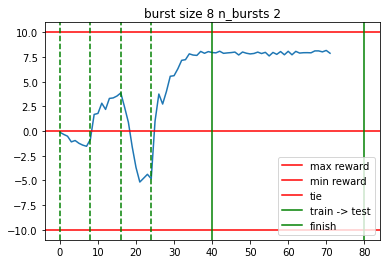

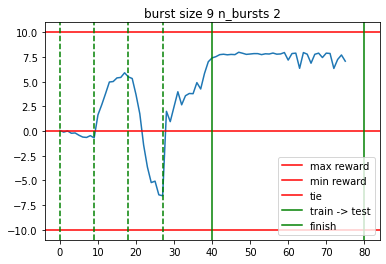

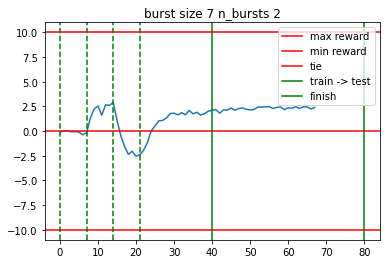

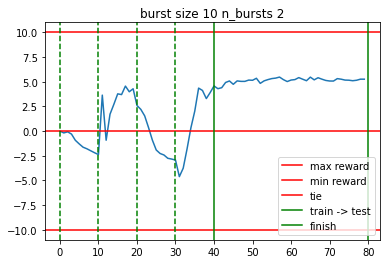

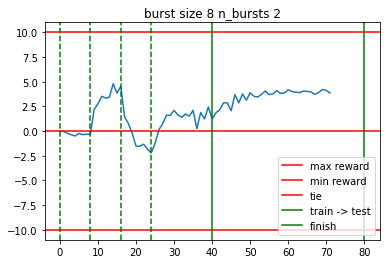

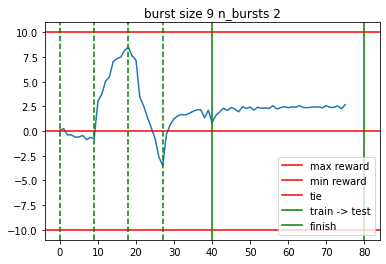

In [185]:
# mapping n_bursts to the result
results = []

for k in sorted(dfs.keys()):
    df1 = dfs[k]
    max(df1['info/num_steps_trained'])
    
    summary_row = df.loc[df.logdir == k]
    
    burst_size = int(summary_row['config/burst_size'])
    
    if burst_size == 0:
        continue
    
    train_steps = int(summary_row['config/train_steps'])
    start_time = datetime.fromtimestamp(int(df1['timestamp'].iloc[0])).strftime("%d/%m/%Y %H:%M:%S")
    n_bursts = train_steps // (2 * burst_size)
    
    if n_bursts == 0:
        continue
        
    if burst_size > 10:
        continue
        
    adversary_reward = df1[target]
        
        
    results.append({'n_bursts': n_bursts,
                    'adversary_reward': max(adversary_reward[train_steps:]),
                    'burst_size': burst_size})

    plt.title("burst size %d n_bursts %d" % (burst_size, n_bursts))
    plt.plot(adversary_reward)
    plt.axhline(-10, color='red', label='max reward')
    plt.axhline(10, color='red', label='min reward')
    plt.axhline(0, color='red', label='tie')
    plt.axvline(train_steps, color='green', label='train -> test')
    plt.axvline(2 * train_steps, color='green', label='finish')

    curr_pt = 0
    for i in range(n_bursts):
        plt.axvline(curr_pt, ls='--', color='green')
        plt.axvline(curr_pt + burst_size, ls='--', color='green')
        curr_pt += 2 * burst_size
    
    plt.legend()
    plt.show()

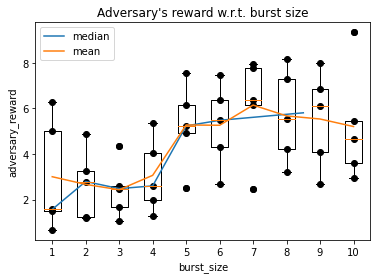

In [186]:
plt.title("Adversary's reward w.r.t. burst size")

df_results = pd.DataFrame(results)
xs = np.unique(df_results['burst_size'])
ys = [df_results.loc[df_results['burst_size'] == k]['adversary_reward'] for k in xs]

#sns.boxplot(x='n_bursts', y='adversary_reward', positions=np.unique(df_results['n_bursts']), data=df_results)

for x, ys_ in zip(xs, ys):
    plt.scatter([x] * len(ys_), ys_, color='black')

plt.boxplot(ys, positions=xs)

df_mean = df_results.groupby('n_bursts').median()
df_mean.reset_index(level=0, inplace=True)
df_mean
sns.lineplot(x='burst_size', y='adversary_reward', data=df_mean, label='median')

df_mean = df_results.groupby('burst_size').mean()
df_mean.reset_index(level=0, inplace=True)
df_mean
sns.lineplot(x='burst_size', y='adversary_reward', data=df_mean, label='mean')

plt.show()

In [167]:
np.unique(df_results['n_bursts'])

array([ 2,  3,  4,  5,  6, 10, 20])

,n_bursts,adversary_reward
0,2,5.639405
1,3,5.260476
2,4,5.273333
3,5,3.063333
4,6,2.430952
5,10,2.666190
6,20,3.002857


(array([  0.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,   0.]),
 array([39.5, 39.6, 39.7, 39.8, 39.9, 40. , 40.1, 40.2, 40.3, 40.4, 40.5]),
 <a list of 10 Patch objects>)

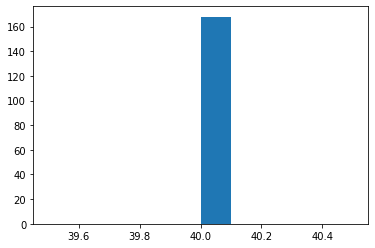

In [100]:
plt.hist(df['config/train_steps'])